<a href="https://colab.research.google.com/github/Vinisha-projects/Intelligence-Projects/blob/main/Anomaly_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sample_data.csv to sample_data.csv
📊 Dataset preview:
   value
0     10
1     12
2     11
3     13
4      9

📈 Mean: 82.93
📉 Standard Deviation: 190.58

🚨 Detected Anomalies:
    value
5     500
11    600


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


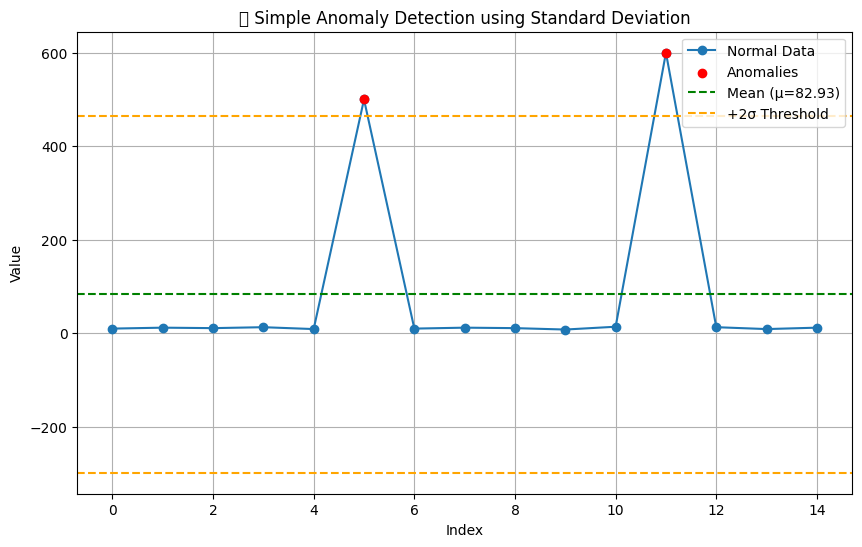

In [1]:
# Step 0: Upload the file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load dataset (uploaded file)
try:
    df = pd.read_csv('sample_data.csv')
except FileNotFoundError:
    print("❌ Error: 'sample_data.csv' not found. Please upload it correctly.")
    exit()

# Step 2: Clean dataset
df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert to numeric, non-numeric -> NaN
df = df.dropna(subset=['value'])  # Drop rows where value is NaN
df.reset_index(drop=True, inplace=True)

# Step 3: Display initial data
print("📊 Dataset preview:")
print(df.head())

# Step 4: Calculate Mean and Standard Deviation
mean = df['value'].mean()
std = df['value'].std()

print(f"\n📈 Mean: {mean:.2f}")
print(f"📉 Standard Deviation: {std:.2f}")

# Step 5: Anomaly Detection
threshold = 2  # 2 standard deviations
anomalies = df[np.abs(df['value'] - mean) > threshold * std]

print("\n🚨 Detected Anomalies:")
print(anomalies)

# Step 6: Plot Results
plt.figure(figsize=(10, 6))
plt.plot(df['value'], marker='o', label='Normal Data')
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomalies', zorder=5)
plt.axhline(mean, color='green', linestyle='--', label=f'Mean (μ={mean:.2f})')
plt.axhline(mean + threshold*std, color='orange', linestyle='--', label=f'+{threshold}σ Threshold')
plt.axhline(mean - threshold*std, color='orange', linestyle='--')
plt.title('📈 Simple Anomaly Detection using Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
